In [ ]:
# Imports
from google.colab import drive
drive.mount('/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
four_factors = pd.read_csv('../drive/MyDrive/data/Basketball/four_factors.csv')

In [ ]:
four_factors.shape

(687, 29)

In [ ]:
four_factors.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK,season
0,1610612737,Atlanta Hawks,82,33,49,0.402,3956.0,0.471,0.294,0.166,0.297,0.495,0.293,0.161,0.311,1,22,22,22,20,18,13,25,22,28,14,11,9,2002
1,1610612738,Boston Celtics,82,49,33,0.598,3966.0,0.476,0.291,0.144,0.272,0.464,0.318,0.173,0.305,1,8,8,8,8,15,14,5,29,6,24,2,5,2002
2,1610612766,Charlotte Hornets,82,44,38,0.537,3951.0,0.466,0.320,0.154,0.333,0.465,0.294,0.152,0.311,1,11,11,11,24,20,6,10,9,7,15,18,8,2002
3,1610612741,Chicago Bulls,82,21,61,0.256,3961.0,0.456,0.302,0.166,0.298,0.497,0.321,0.156,0.315,1,28,28,28,15,26,11,24,21,29,26,15,12,2002
4,1610612739,Cleveland Cavaliers,82,29,53,0.354,3971.0,0.477,0.301,0.158,0.319,0.493,0.302,0.141,0.310,1,24,24,24,6,11,12,16,15,27,17,26,7,2002


In [ ]:
four_factors.tail()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK,season
682,1610612758,Sacramento Kings,82,46,36,0.561,3971.0,0.556,0.229,0.131,0.285,0.555,0.266,0.138,0.256,1,16,16,16,3,14,22,11,15,21,25,12,1,2024
683,1610612759,San Antonio Spurs,82,22,60,0.268,3966.0,0.532,0.220,0.148,0.269,0.555,0.222,0.131,0.279,1,26,26,26,7,23,28,24,23,20,4,22,13,2024
684,1610612761,Toronto Raptors,82,25,57,0.305,3961.0,0.535,0.241,0.139,0.281,0.566,0.218,0.138,0.306,1,25,25,25,10,21,16,20,18,27,3,14,29,2024
685,1610612762,Utah Jazz,82,31,51,0.378,3961.0,0.539,0.251,0.155,0.325,0.567,0.235,0.122,0.283,1,23,23,23,10,18,11,30,2,28,9,28,18,2024
686,1610612764,Washington Wizards,82,15,67,0.183,3946.0,0.538,0.221,0.136,0.240,0.562,0.258,0.136,0.317,1,29,29,29,23,19,27,16,30,26,23,19,30,2024


In [ ]:
four_factors.head()



,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK,season
0,1610612737,Atlanta Hawks,82,33,49,0.402,3956.0,0.471,0.294,0.166,0.297,0.495,0.293,0.161,0.311,1,22,22,22,20,18,13,25,22,28,14,11,9,2002
1,1610612738,Boston Celtics,82,49,33,0.598,3966.0,0.476,0.291,0.144,0.272,0.464,0.318,0.173,0.305,1,8,8,8,8,15,14,5,29,6,24,2,5,2002
2,1610612766,Charlotte Hornets,82,44,38,0.537,3951.0,0.466,0.320,0.154,0.333,0.465,0.294,0.152,0.311,1,11,11,11,24,20,6,10,9,7,15,18,8,2002
3,1610612741,Chicago Bulls,82,21,61,0.256,3961.0,0.456,0.302,0.166,0.298,0.497,0.321,0.156,0.315,1,28,28,28,15,26,11,24,21,29,26,15,12,2002
4,1610612739,Cleveland Cavaliers,82,29,53,0.354,3971.0,0.477,0.301,0.158,0.319,0.493,0.302,0.141,0.310,1,24,24,24,6,11,12,16,15,27,17,26,7,2002


In [ ]:
four_off_factors = ['EFG_PCT', 'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT']
four_def_factors = ['OPP_EFG_PCT', 'OPP_FTA_RATE', 'OPP_TOV_PCT','OPP_OREB_PCT']

In [ ]:
X = four_factors[four_off_factors+four_def_factors]

In [ ]:
X.shape

(687, 8)

In [ ]:
X.head()

,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,0.471,0.294,0.166,0.297,0.495,0.293,0.161,0.311
1,0.476,0.291,0.144,0.272,0.464,0.318,0.173,0.305
2,0.466,0.320,0.154,0.333,0.465,0.294,0.152,0.311
3,0.456,0.302,0.166,0.298,0.497,0.321,0.156,0.315
4,0.477,0.301,0.158,0.319,0.493,0.302,0.141,0.310


In [ ]:
y = four_factors['W']

## All Seasons

In [ ]:
# Scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
m1 = LinearRegression()
m1.fit(X,y)


LinearRegression()

In [ ]:
m1.coef_

array([ 365.35106575,   53.13343903, -358.4275574 ,  136.03310786,
       -378.43709621,  -39.30764322,  256.24741979, -106.52419281])

In [ ]:
m1.intercept_

49.54286294745721

$\hat{y} = 50 + 365\times \text{EFG_PCT} + 53 \times \text{FTA_RATE} - 358 \times \text{TM_TOV_PCT} + 136 \times \text{OREB_PCT} -378 \times \text{OPP_EFG_PCT} - 39 \times \text{OPP_FTA_RATE} + 256 \times \text{OPP_TOV_PCT} - 107 \times \text{OPP_OREB_PCT}$

In [ ]:
X.mean(axis=0)

,0
EFG_PCT,0.505338
FTA_RATE,0.283876
TM_TOV_PCT,0.149603
OREB_PCT,0.292962
OPP_EFG_PCT,0.505330
OPP_FTA_RATE,0.283948
OPP_TOV_PCT,0.149587
OPP_OREB_PCT,0.293218


In [ ]:
# The "average" team will have 40 wins
m1.intercept_ + (m1.coef_*X.mean(axis=0)).sum()

40.18195050946143

In [ ]:
# Statsmodels
X1 = sm.add_constant(X)
m1_sm = sm.OLS(y,X1).fit()
print(m1_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     743.0
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -1909.7
No. Observations:                 687   AIC:                             3837.
Df Residuals:                     678   BIC:                             3878.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           49.5429      7.061      7.016   

## Problem! Some seasons had fewer games than others (lockouts, covid, etc.)
- To make things more equitable, let the target by win percentage instead of wins.

In [ ]:
four_factors.head(2)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,EFG_PCT_RANK,FTA_RATE_RANK,TM_TOV_PCT_RANK,OREB_PCT_RANK,OPP_EFG_PCT_RANK,OPP_FTA_RATE_RANK,OPP_TOV_PCT_RANK,OPP_OREB_PCT_RANK,season
0,1610612737,Atlanta Hawks,82,33,49,0.402,3956.0,0.471,0.294,0.166,0.297,0.495,0.293,0.161,0.311,1,22,22,22,20,18,13,25,22,28,14,11,9,2002
1,1610612738,Boston Celtics,82,49,33,0.598,3966.0,0.476,0.291,0.144,0.272,0.464,0.318,0.173,0.305,1,8,8,8,8,15,14,5,29,6,24,2,5,2002


In [ ]:
y2 = four_factors['W_PCT']

In [ ]:
m2_sm = sm.OLS(y2, X1).fit()
print(m2_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  W_PCT   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1040.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                 1223.1
No. Observations:                 687   AIC:                            -2428.
Df Residuals:                     678   BIC:                            -2387.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6251      0.074      8.462   

$\hat{y} = 0.6 + 4.5 \times \text{EFG_PCT} + 0.6 \times \text{FTA_RATE} - 4.1 \times \text{TM_TOV_PCT} + 1.7 \times \text{OREB_PCT} - 4.7 \times \text{OPP_EFG_PCT} - 0.6 \times \text{OPP_FTA_RATE} + 3.4 \times \text{OPP_TOV_PCT} - 1.5 \times \text{OPP_OREB_PCT}$

In [ ]:
# the "average" team's win percentage is estimated to be...
(X1.mean(axis=0)*m2_sm.params).sum()

0.49977583697234335

In [ ]:
y2.mean()

0.4997758369723435

## What if we try the difference between offensive and defensive factors?

In [ ]:
X_diff = X.copy()

In [ ]:
X_diff['EFG_PCT_d'] = X_diff['EFG_PCT']-X_diff['OPP_EFG_PCT']
X_diff['FTA_RATE_d'] = X_diff['FTA_RATE']-X_diff['OPP_FTA_RATE']
X_diff['TM_TOV_PCT_d'] = X_diff['TM_TOV_PCT']-X_diff['OPP_TOV_PCT']
X_diff['OREB_PCT_d'] = X_diff['OREB_PCT']-X_diff['OPP_OREB_PCT']
X_diff = X_diff.drop(['EFG_PCT','OPP_EFG_PCT','FTA_RATE','OPP_FTA_RATE',
                      'TM_TOV_PCT','OPP_TOV_PCT', 'OREB_PCT','OPP_OREB_PCT'],axis=1)

In [ ]:
X_diff.head()

,EFG_PCT_d,FTA_RATE_d,TM_TOV_PCT_d,OREB_PCT_d
0,-0.024,0.001,0.005,-0.014
1,0.012,-0.027,-0.029,-0.033
2,0.001,0.026,0.002,0.022
3,-0.041,-0.019,0.010,-0.017
4,-0.016,-0.001,0.017,0.009


''

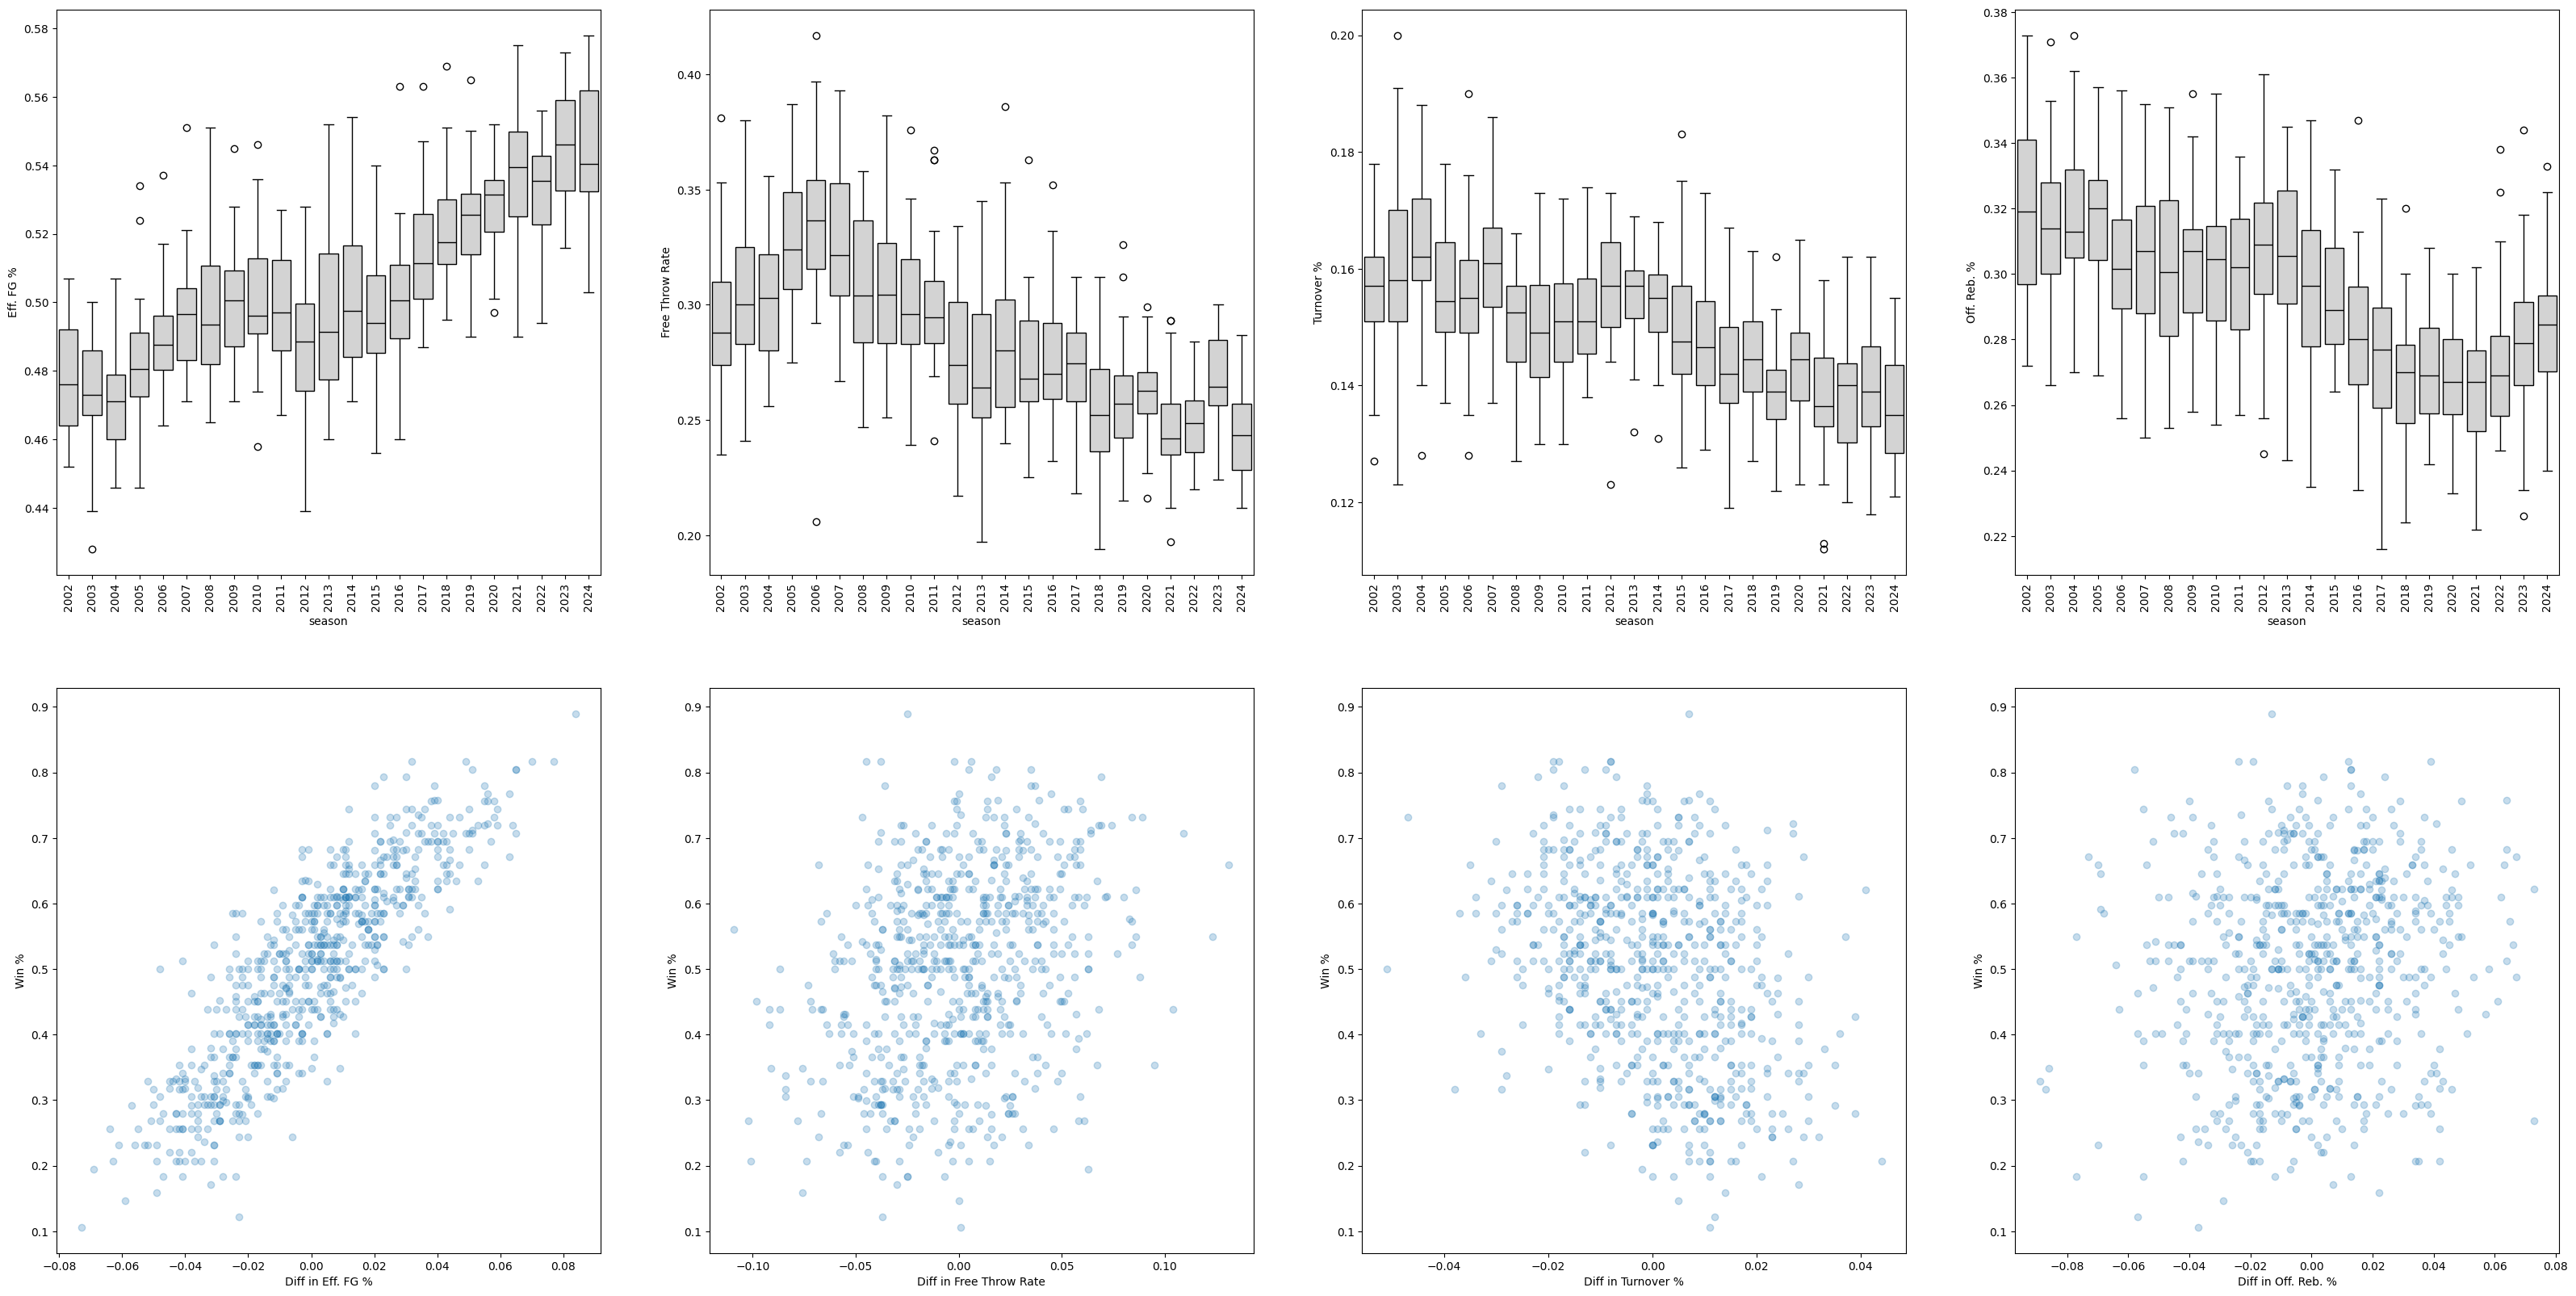

In [ ]:
four_factors['EFG_PCT_d'] = four_factors['EFG_PCT']-four_factors['OPP_EFG_PCT']
four_factors['FTA_RATE_d'] = four_factors['FTA_RATE']-four_factors['OPP_FTA_RATE']
four_factors['TM_TOV_PCT_d'] = four_factors['TM_TOV_PCT']-four_factors['OPP_TOV_PCT']
four_factors['OREB_PCT_d'] = four_factors['OREB_PCT']-four_factors['OPP_OREB_PCT']

fig, axes = plt.subplots(2,4, figsize=(40,20))

sns.boxplot(data=four_factors, x='season',y='EFG_PCT', color='lightgray', linecolor='black', ax=axes[0,0])
unique_seasons = sorted(four_factors['season'].unique())
axes[0,0].set_xticks(range(len(unique_seasons)))
axes[0,0].set_xticklabels(unique_seasons, rotation=90)
axes[0,0].set_ylabel('Eff. FG %')

axes[1,0].scatter(x=four_factors['EFG_PCT_d'], y=four_factors['W_PCT'], alpha=.25)
axes[1,0].set_xlabel('Diff in Eff. FG %')
axes[1,0].set_ylabel('Win %')

sns.boxplot(data=four_factors, x='season',y='FTA_RATE', color='lightgray', linecolor='black', ax=axes[0,1])
unique_seasons = sorted(four_factors['season'].unique())
axes[0,1].set_xticks(range(len(unique_seasons)))
axes[0,1].set_xticklabels(unique_seasons, rotation=90)
axes[0,1].set_ylabel('Free Throw Rate')

axes[1,1].scatter(x=four_factors['FTA_RATE_d'], y=four_factors['W_PCT'], alpha=.25)
axes[1,1].set_xlabel('Diff in Free Throw Rate')
axes[1,1].set_ylabel('Win %')

sns.boxplot(data=four_factors, x='season',y='TM_TOV_PCT', color='lightgray', linecolor='black', ax=axes[0,2])
unique_seasons = sorted(four_factors['season'].unique())
axes[0,2].set_xticks(range(len(unique_seasons)))
axes[0,2].set_xticklabels(unique_seasons, rotation=90)
axes[0,2].set_ylabel('Turnover %')

axes[1,2].scatter(x=four_factors['TM_TOV_PCT_d'], y=four_factors['W_PCT'], alpha=.25)
axes[1,2].set_xlabel('Diff in Turnover %')
axes[1,2].set_ylabel('Win %')

sns.boxplot(data=four_factors, x='season',y='OREB_PCT', color='lightgray', linecolor='black', ax=axes[0,3])
unique_seasons = sorted(four_factors['season'].unique())
axes[0,3].set_xticks(range(len(unique_seasons)))
axes[0,3].set_xticklabels(unique_seasons, rotation=90)
axes[0,3].set_ylabel('Off. Reb. %')

axes[1,3].scatter(x=four_factors['OREB_PCT_d'], y=four_factors['W_PCT'], alpha=.25)
axes[1,3].set_xlabel('Diff in Off. Reb. %')
axes[1,3].set_ylabel('Win %')
;

In [ ]:
X_diff.head()

,EFG_PCT_d,FTA_RATE_d,TM_TOV_PCT_d,OREB_PCT_d
0,-0.024,0.001,0.005,-0.014
1,0.012,-0.027,-0.029,-0.033
2,0.001,0.026,0.002,0.022
3,-0.041,-0.019,0.010,-0.017
4,-0.016,-0.001,0.017,0.009


In [ ]:
X_diff1.head()

,const,EFG_PCT_d,FTA_RATE_d,TM_TOV_PCT_d,OREB_PCT_d
0,1.0,-0.024,0.001,0.005,-0.014
1,1.0,0.012,-0.027,-0.029,-0.033
2,1.0,0.001,0.026,0.002,0.022
3,1.0,-0.041,-0.019,0.010,-0.017
4,1.0,-0.016,-0.001,0.017,0.009


In [ ]:
X_diff1 = sm.add_constant(X_diff)
m3_sm = sm.OLS(y2, X_diff1).fit()
print(m3_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  W_PCT   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2038.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:49:31   Log-Likelihood:                 1214.9
No. Observations:                 687   AIC:                            -2420.
Df Residuals:                     682   BIC:                            -2397.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5003      0.002    316.440   

- the fit did **not** improve over the last model (see R-Squared, Adj. R-Squared)

## Let's check the assumptions of our last model.

In [ ]:
# (In-sample) Predictions
y_pred_m1 = m1_sm.predict()
y_pred_m2 = m2_sm.predict()
y_pred_m3 = m3_sm.predict()

# Residuals
residuals_m1 = y-y_pred_m1
residuals_m2 = y2 - y_pred_m2
residuals_m3 = y2 - y_pred_m3

In [ ]:
def VIF(X):
  # Computes variance inflation factor
  df_VIF = pd.DataFrame()
  df_VIF['Feature'] = X.columns
  df_VIF["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

  return df_VIF

In [ ]:
# Check for multicollinearity

# First check correlation matrix
print("Original Features")
X.corr()

Original Features


,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
EFG_PCT,1.000000,-0.370628,-0.533741,-0.559625,0.519113,-0.500439,-0.435494,-0.514339
FTA_RATE,-0.370628,1.000000,0.491661,0.463880,-0.446323,0.531872,0.344210,0.404498
TM_TOV_PCT,-0.533741,0.491661,1.000000,0.500957,-0.419647,0.478145,0.386801,0.437184
OREB_PCT,-0.559625,0.463880,0.500957,1.000000,-0.388401,0.404811,0.299274,0.449655
OPP_EFG_PCT,0.519113,-0.446323,-0.419647,-0.388401,1.000000,-0.375645,-0.409103,-0.396683
OPP_FTA_RATE,-0.500439,0.531872,0.478145,0.404811,-0.375645,1.000000,0.515144,0.482867
OPP_TOV_PCT,-0.435494,0.344210,0.386801,0.299274,-0.409103,0.515144,1.000000,0.553516
OPP_OREB_PCT,-0.514339,0.404498,0.437184,0.449655,-0.396683,0.482867,0.553516,1.000000


- Some correlations here (higher than we would probably want...)

In [ ]:
print(f"Differenced Features")
X_diff.corr()

Differenced Features


,EFG_PCT_d,FTA_RATE_d,TM_TOV_PCT_d,OREB_PCT_d
EFG_PCT_d,1.000000,0.212801,-0.081138,-0.086969
FTA_RATE_d,0.212801,1.000000,0.174059,0.131424
TM_TOV_PCT_d,-0.081138,0.174059,1.000000,0.277377
OREB_PCT_d,-0.086969,0.131424,0.277377,1.000000


- Correlations are much smaller here...

In [ ]:
# Just finding pairwise correlations is NOT enough!
VIF(X)

,Feature,VIF
0,EFG_PCT,396.239385
1,FTA_RATE,97.257610
2,TM_TOV_PCT,203.548358
3,OREB_PCT,165.608210
4,OPP_EFG_PCT,450.826647
5,OPP_FTA_RATE,103.690559
6,OPP_TOV_PCT,195.666934
7,OPP_OREB_PCT,275.047987


- Some very high VIFs here! Usually VIF > 10 is considered high multicollinearity

In [ ]:
VIF(X_diff)

,Feature,VIF
0,EFG_PCT_d,1.072243
1,FTA_RATE_d,1.101999
2,TM_TOV_PCT_d,1.116691
3,OREB_PCT_d,1.100773


- Much better and very little multicollinearity!
- As a result, we will move forward with this model.

Text(0.5, 0, 'Residuals')

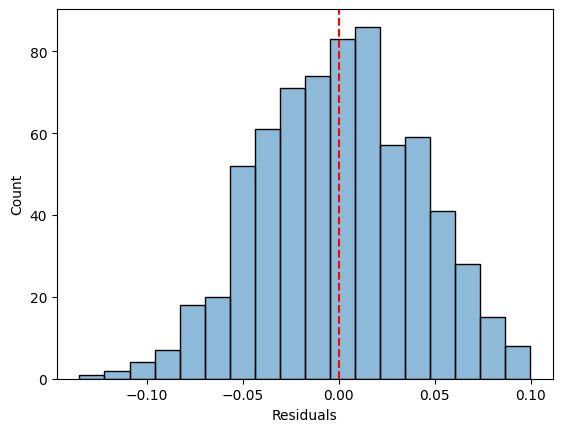

In [ ]:
sns.histplot(residuals_m3, alpha=.5)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.xlabel('Residuals')

- Mostly looks symmetric, perhaps slightly skewed

Text(0, 0.5, 'Residuals')

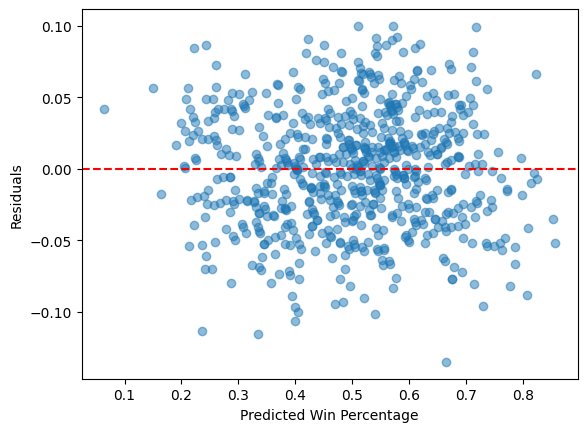

In [ ]:
plt.scatter(x=y_pred_m3, y=residuals_m3, alpha=.5)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel('Predicted Win Percentage')
plt.ylabel('Residuals')

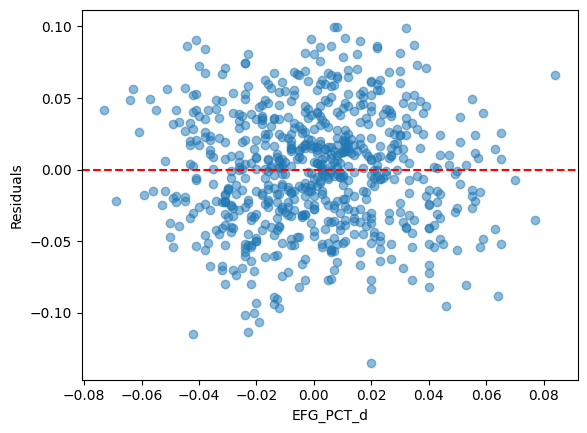

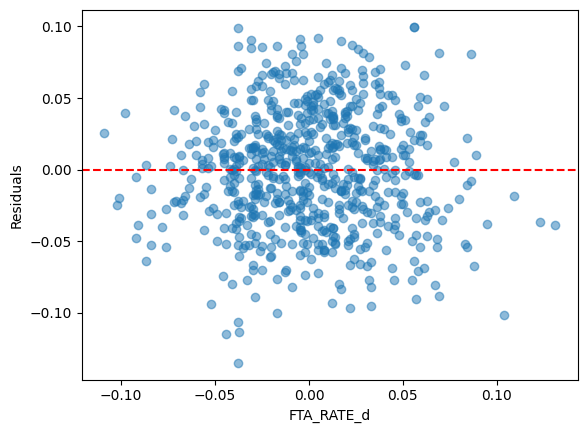

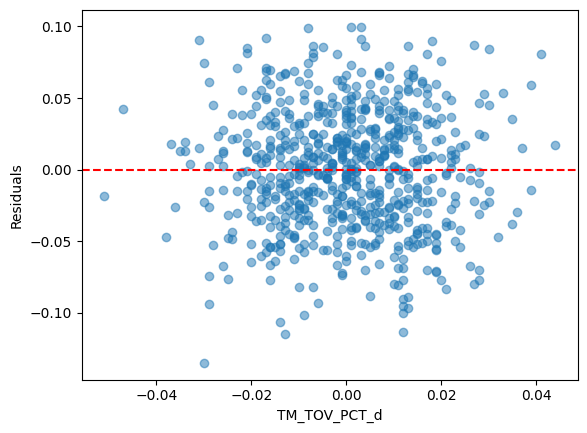

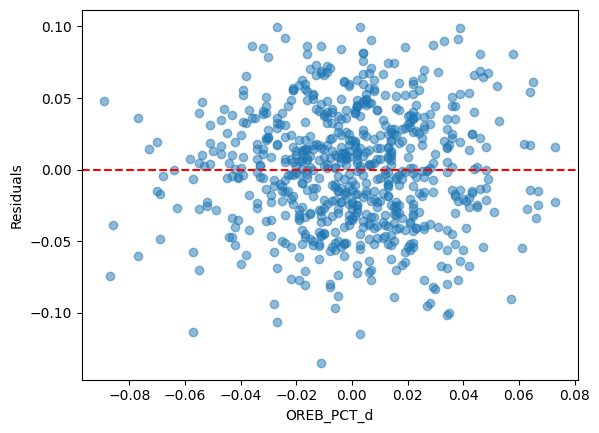

In [ ]:
for i in X_diff.columns:
  plt.scatter(x=X_diff[i],y=residuals_m3, alpha=.5)
  plt.axhline(y=0, color='red', linestyle='dashed')
  plt.xlabel(f"{i}")
  plt.ylabel('Residuals')
  plt.show()

- No obvious patterns
- Looks like random noise

This means that we can reasonably conclude the following about our linear regression assumptions...
- No issues with linearity
- No issues with independent errors
- No issues with constant variance


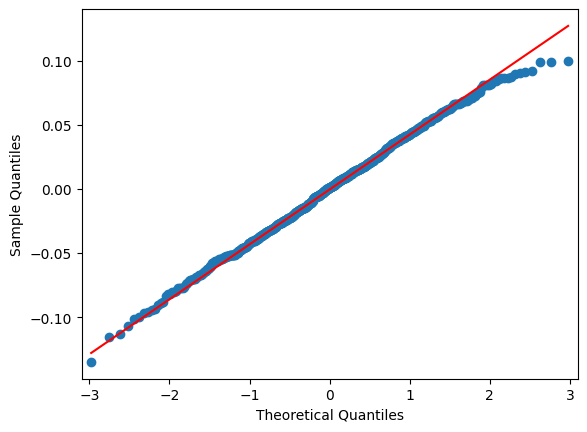

In [ ]:
#import pylab as py
sm.qqplot(residuals_m3, line='q')
plt.show()

QQ plot looks good and no obvious non-normality issues...but we can test this rigorously with a hypothesis test.

In [ ]:
shapiro(residuals_m3)

ShapiroResult(statistic=0.9968546743071302, pvalue=0.20107072535125475)

- large p-values ==> fail to reject H0 ==> not enough evidence to reject normality assumption

In [ ]:
influence = m3_sm.get_influence()

Text(0.5, 1.0, "Cook's Distance")

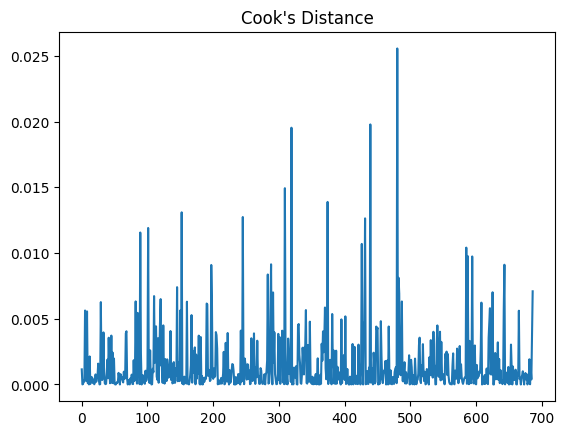

In [ ]:
plt.plot(influence.cooks_distance[0])
plt.title("Cook's Distance")

- All < 1 ==> relatively small ==> no real influential points here.

## Conclusion
- No obvious issues with any assumptions of linear regression for the four factors. Our inferences should be valid and trustworthy.

In [ ]:
four_factors['season'].max()

2021

In [ ]:
four_factors['season'].min()

2002